In [13]:
import sqlite3 as sql
import pandas as pd

conn = sql.connect("factbook.db")
q1 = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [14]:
# display few rows of the table to get familiar with it
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


### Summary Statistics

Let's start by calculating some summary statistics and look for any outlier countries:
* minimum & maximum population
* minimum & maximum population growth


In [18]:
q3 = "select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


### Outliers

From the previous screen, we can see countries with 0 people and countries with more than 7 billion people.

Let's zoom in on just these countries.

In [16]:
q4 = "select * from facts where population=0"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [17]:
q5 = "select * from facts where population=(select MAX(population) from facts)"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0.

### Histograms

Let's generate histograms for the rest of the countries in the table, ignoring the last 2 rows.

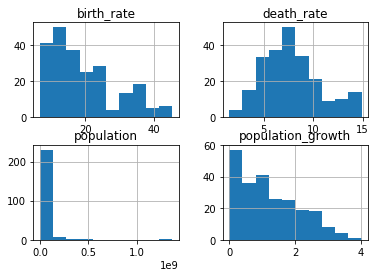

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

q6 = "select population, population_growth, birth_rate, death_rate from facts where population not in ((select min(population) from facts),(select max(population) from facts))"
pd.read_sql_query(q6, conn).hist()
plt.show()

### Working on Density

The question is: 
* Which countries have the highest population density?
* Which countries have the highest ratios of water to land? 
* Which countries have more water than land?

In [20]:
# density: population/land area
q7 = "select name, cast(population as float)/cast(area_land as float) as density from facts order by density DESC limit 20"
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


In [28]:
# highest ratios of water to land
q8 = "select name, cast(area_water as float)/cast(area_land as float) as density from facts order by density DESC limit 20"
pd.read_sql_query(q8, conn)

,name,density
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


It is interesting to note the first row, from [Wikipedia](https://en.wikipedia.org/wiki/British_Indian_Ocean_Territory): "The territory comprises over 1,000 individual islands". 

In [29]:
# more water than land
q9 = "select * from facts where area_water > area_land"
pd.read_sql_query(q9, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,228,io,British Indian Ocean Territory,54400,60,54340,NaN,NaN,NaN,NaN,NaN,2015-11-01 13:37:35.922896,2015-11-01 13:37:35.922896
1,247,vq,Virgin Islands,1910,346,1564,103574.0,0.59,10.31,8.54,7.67,2015-11-01 13:38:38.270075,2015-11-01 13:38:38.270075
